# Exercises 3: Econophysics

The purpose of this exercise is computing the asset price of an European option using a Monte Carlo method.

The theoretical base lies on the Black-Scholes theory, which assumes that the asset price behaves like a geometric Brownian motion (GBM): $S(t) \approx GBM(r,\sigma^2)$, fixing the risk-free interest rate $r$ and volatility $\sigma$ as costants.

First of all, we define and set all the option parameters:

- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

Then, in order to calculate the time evolution of the price, we can procede in two ways:

**a)** by **direct sampling** the final price at $t=T$, using the following formula:

$$S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right]$$

where $S(0)$ is the initial price, the mean $\mu = r$ and $W(T)$ is the  Wiener process function which is sampled by a normal distribution $\mathcal{N}(0,T)$.

**a)** by **discretized sampling**, dividing the time inverval $[0,T]$ in 100 sub-intervals and evaluating the price at each step: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T)$; so the recursive formula is:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i) +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \approx \mathcal{N}(0,1)$.
    
Given the asset price at delivery time $S(T)$, we can now evaluate the call and put value at the initial time, as it follows:

**Call profit**: $C(0)=max[0,S(T)-K] \ e^{-rT}$

**Put profit**: $P(0)=max[0,K-S(T)] \ e^{-rT}$

where $e^{-rT}$ shows the time relation between a call (put) at initial and delivery time.

Having chosen the Europen option, we can also check the quality of the sampling by comparing with the <i> BS analytic solution</i>:

- $C_{real}(0)=14.975790778311286$
- $P_{real}(0)=5.4595325819072364$

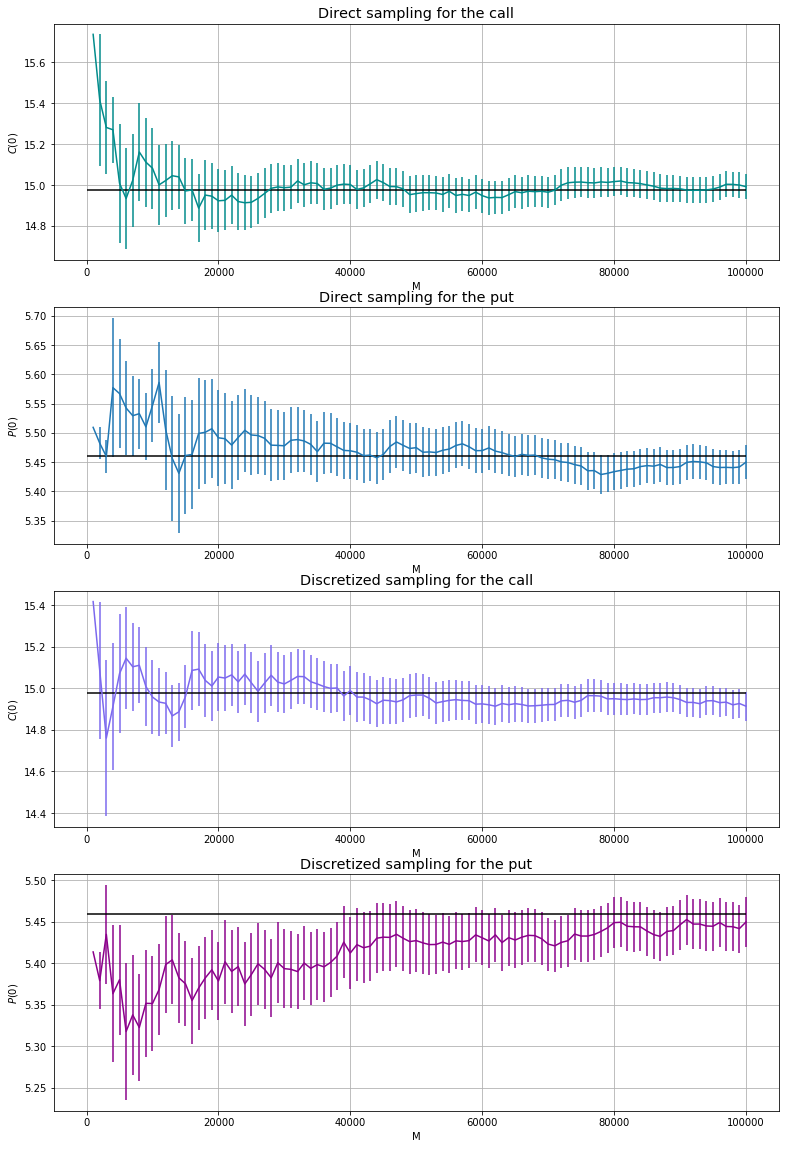

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x1,y1,err1=np.loadtxt("direct-call.out",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("direct-put.out",usecols=(0,1,2),unpack=True)
x3,y3,err3=np.loadtxt("discrete-call.out",usecols=(0,1,2),unpack=True)
x4,y4,err4=np.loadtxt("discrete-put.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(13, 20))

plt.subplot(411)
plt.errorbar(x1,y1,yerr=err1, color='darkcyan')
plt.hlines(14.975790778311286, 0, 100000)
plt.xlabel('M')
plt.ylabel('$C(0)$')
plt.title("Direct sampling for the call",size='x-large')
plt.grid(True)

plt.subplot(412)
plt.errorbar(x2,y2,yerr=err2)
plt.hlines(5.4595325819072364, 0, 100000)
plt.xlabel('M')
plt.ylabel('$P(0)$')
plt.title("Direct sampling for the put",size='x-large')
plt.grid(True)

plt.subplot(413)
plt.errorbar(x3,y3,yerr=err3, color='mediumslateblue')
plt.hlines(14.975790778311286, 0, 100000)
plt.xlabel('M')
plt.ylabel('$C(0)$')
plt.title("Discretized sampling for the call",size='x-large')
plt.grid(True)

plt.subplot(414)
plt.errorbar(x4,y4,yerr=err4, color='darkmagenta')
plt.hlines(5.4595325819072364, 0, 100000)
plt.xlabel('M')
plt.ylabel('$P(0)$')
plt.title("Discretized sampling for the put",size='x-large')
plt.grid(True)

plt.grid(True)
plt.show()

Both samplings show a good convergence to the analytical solution. Given this, we would rather choose the direct sampling for computational reasons.